<a href="https://colab.research.google.com/github/andyclaros/Proyecto_ejemplo/blob/master/Graficos_varios_(spoty).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Análisis Exploratorio de Datos con Pandas

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

## Temario

Estos son algunos de los temas que intentaremos revisar a lo largo del analisis propuesto

- Carga de informacion en un DataFrame
- Analizando propiedades especificas del set de datos
- Verificacion de Calidad de Datos
- Utilizando Visualizaciones para nuestro Analisis exploratorio
    - Examinando la distribucion de una variables
        - Histograma
        - Density Plot
    - Explorando relacion entre variables
        - Overlaid Histogram
        - Scatter Plot
        - Paiplot
    - Comparando Grupos o categorias
        - Box Plot
        - Bar Plot


In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Analisis Exploratorio de Datos: Spotify - All Time Top 2000s Mega Dataset

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset](https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset)

Este set contiene informacion de aquellas canciones que 2000 canciones que son consideradas las canciones mas populares por toda la comunidad que utiliza spotify en su playlist "All Time Top 2000s". Las canciones segun la descripcion pueden estar comprendidas entre 1956 a 2019. A su vez el set brinda una gran cantidad de muchas estadisticas y audio features que nos permitiran hacer una analisis interesante sobre el mismo.


### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='16-ueDfnUj8P-WILb0sf0bUVIhjxIZqaX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Spotify-2000.csv')

In [ ]:
# %timeit sirve para evaluar el tiempo de ejecucion
spotify_songs = pd.read_csv('Spotify-2000.csv')
spotify_songs.head()


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
# %timeit sirve para evaluar el tiempo de ejecucion
spotify_songs = pd.read_csv('Spotify-2000.csv')
spotify_songs.head()


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
# al mismo tiempo podemos ver informacion de las distintas columnas o atributos que tenemos en el dataframe
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
# nos da las dimensiones del data frame (rows x columns)
print(spotify_songs.shape)

(1994, 15)


In [ ]:
# en caso de ser una serie devuelve el numero de rows
# en caso de ser un dataframe devuelve el numero de rows x el numero de columns 
spotify_songs.size

29910

In [ ]:
# podemos contar la cantidad de elementos elementos no nulos en el data frame
spotify_songs.count()

Index                     1994
Title                     1994
Artist                    1994
Top Genre                 1994
Year                      1994
Beats Per Minute (BPM)    1994
Energy                    1994
Danceability              1994
Loudness (dB)             1994
Liveness                  1994
Valence                   1994
Length (Duration)         1994
Acousticness              1994
Speechiness               1994
Popularity                1994
dtype: int64

### Analizando propiedades especificas del set de datos

Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.
Podemos por ejemplo comenzar las **Generos musicales** en la columna o atributo, ```Top Genre```

In [ ]:
genres = spotify_songs['Top Genre']

NameError: ignored

In [ ]:
type(genres)

NameError: ignored

In [ ]:
# de esta forma obtenemos la cantidad de valores que hay para cada una de las main_categories 
# contando los proyectos por categoria principal
genres.value_counts()

NameError: ignored

Tambien podemos interesarnos en ver los posibles valores que podemos tener de **Artistas**, para ver si tenemos artistas que tiene mayor representacion en el set de datos, y tal vez algunos one hit wonders.

In [ ]:
artists = spotify_songs['Artist']
artists.value_counts()

En ambos casos, podemos considerar a las variables como categoricas que podremos usar para nuestro analisis, las cuales podremos utilizar para agrupar o dividir informacion, o filtrar informacion a considerar en el mismo. Sin embargo, tenemos que ver que tratamiento le damos a la misma ya que en ambos casos, al ser la clasificacion tal vez muy especifica, tenemos muchos Artistas o Generos con un unico elemento.

Apliquemos ese analisis a los generos

In [ ]:
# Analicemos los generos
genres_counts = genres.value_counts()
genres_with_one_song = genres_counts[genres_counts == 1]
genres_with_one_song.count()

In [ ]:
len(genres.unique())

Esto nos indica que aproximamente 1/3 de los generos que tenemos tienen una unica cancion.
Veamos ahora que sucede con los Artistas.

In [ ]:
# Analicemos los artistas
artists_counts = artists.value_counts()
artists_with_one_song = artists_counts[artists_counts==1]
artists_with_one_song.count()

In [ ]:
len(artists.unique())

Por lo que podemos ver que mas del 50% de los artistas que tenemos solamente tiene una cancion en el listado.
Podemos tomar esto en consideracion esto luego para el analisis, usandolas como variables categoricas y al mismo tiempo considerando si o tenemos que considerarlas en grupos separados para el analisis (Por ejemplo en el caso de los artistas separar aquellos que tienen solamente una cancion popular, los *one hit wonders*)

por otro lado podemos analizar la columna **Year** para entender su uso en el data set.


In [ ]:
spotify_songs['Year'].value_counts()

In [ ]:
spotify_songs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5)) # ver layout

En ese sentido podemos que en lineas generales tenemos de represetancion de todas las decadas musicales en los datos que estamos analizando.

Por otro lado podemos analizar algunos de los campos numericos que tenemos en el set que nos indican informacion sobre la cancion, por ejemplo: ```Beats Per Minute (BPM)```. Usualmente se suele medir el Tiempo o Tempo de una cancion, que entendemos como la velocidad que tiene una cancion. Esto es de interesa al analizar generos musicales algunos Tempos promedio son usuales en ciertos generos musicales.

Mas informacion aqui: https://learningmusic.ableton.com/make-beats/beat-and-tempo.html

In [ ]:
spotify_songs['Beats Per Minute (BPM)']

Sobre este tipo de variables podemos realizar algunos plots rapidos por ejemplo para entender en nuestros datos como se encuentran distribuidos, por ejemplo podriamos querer la distribucion de estos datos, haciendolo con un histograma.

In [ ]:
spotify_songs['Beats Per Minute (BPM)'].plot(kind='hist', bins=80)

Otro atributo o columna que puede resultarnos interesante es el de duracion de las canciones en la columna ```Length```, pudiendo hacer un analisis similar al anterior.

### Analizando utilizacion de memoria del dataframe

Es posible realizar un analisis de utilizacion de memoria del data frame para poder realizar mejoras en el uso de recursos.

In [ ]:
# si especificamente queremos saber los datatypes que estamos utilizando.
# y por ejemplo decidir setear algunos especificamente en carga
spotify_songs.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [ ]:
# veamos la informacion general del dataframe con info()
# nos brinda informacion de la cantidad de rows, si tiene campos nulos y el tipo
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
# indica el uso en bytes de cada columna en bytes
# la opcion deep no permite analizar en profundidad el uso que se esta haciendo de memoria a nivel sistema
#projects_2017.memory_usage(deep=False)
(spotify_songs.memory_usage() / (1024)).sum()

233.796875

Al contar con informacion sobre las columnas del dataframe o analizandolas podemos hacer mejoras en el uso de los tipos del dataframe de tal forma de optimizar el uso de memoria. Los dtypes usados por pandas son esencialmente los dtypes de NumPy.

### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```

In [ ]:
# por ejemplo de la siguiente forma podemos ver los nulos si existen
spotify_songs.isnull().any()

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

In [ ]:
spotify_songs.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

La informacion que podemos considerar en relacion a los nulos nos permite guiarnos sobre la calidad del set de datos que tenemos y casos en los que podemos ver por ejemplo que datos utilizar o no sobre nuestros analisis o si eventualmente tenemos que realizar algun otro tipo de informacion

In [ ]:
# metricas generales de las columnas o features numericos del data frame que podemos analizar via .describe
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,99.00,55.00,100.00


Para nuestros analisis y considerando los valores de media y desviacion sacar algunas conclusiones:

- Podemos ver que la media es de aproximadamente de 120 BPMs, sin demasiada dispersion. Notar que 120 BPMs es un valor bastante standard de tempo de canciones.
- Por alguna razon no vemos informacion estadistica sobre la de duracion de la cancion, punto que deberiamos indagar.
- Hay distintos niveles de variacion en los otros atributos qe tenemos del set de datos y podriamos utilizarlos para analisis de distintos tipos si quisieramos por ejemplo explorar distintas caracteristicas que pueden tener los mismos.

In [ ]:
# podemos con include='all'
spotify_songs.describe(include='all')

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00",1994,1994,1994,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00",1994,"1,994.00","1,994.00","1,994.00"
unique,nan,1958,731,149,nan,nan,nan,nan,nan,nan,nan,350,nan,nan,nan
top,nan,One,Queen,album rock,nan,nan,nan,nan,nan,nan,nan,215,nan,nan,nan
freq,nan,3,37,413,nan,nan,nan,nan,nan,nan,nan,23,nan,nan,nan
mean,997.50,NaN,NaN,NaN,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,NaN,28.86,4.99,59.53
std,575.76,NaN,NaN,NaN,16.12,28.03,22.15,15.35,3.65,16.73,24.86,NaN,29.01,4.40,14.35
min,1.00,NaN,NaN,NaN,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,NaN,0.00,2.00,11.00
25%,499.25,NaN,NaN,NaN,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,NaN,3.00,3.00,49.25
50%,997.50,NaN,NaN,NaN,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,NaN,18.00,4.00,62.00
75%,"1,495.75",NaN,NaN,NaN,"2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,NaN,50.00,5.00,71.00


Evidentemente existe algun problema sobre el campo que nos da informacion de la duracion de la cancion, dado que no se pueden calcular estadisticas sobre el mismo. Veamos nuevamente la salida de ```.info``` para tener mas detalles del tratamiento que le esta dando pandas al respecto.

In [ ]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
# vemos que la columna es de Dtype object lo cual nos indica que es posible que haya algun tipo de problema con el campo.
spotify_songs["Length (Duration)"].str.replace(',','').astype('int64').mean()

262.4433299899699

In [ ]:
spotify_songs["Length (Duration)"] = spotify_songs["Length (Duration)"].str.replace(',','').astype('int64')

In [ ]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

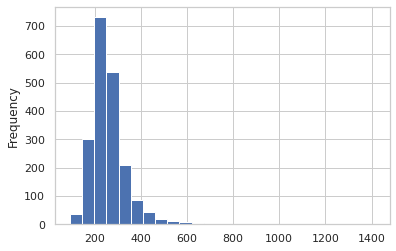

In [ ]:
spotify_songs["Length (Duration)"].plot(kind='hist', bins=25)

In [ ]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,262.44,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,93.60,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,93.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,212.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,245.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,289.00,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,"1,412.00",99.00,55.00,100.00


Por ultimo podemos hacer una verificacion de valores nulos para tomar la decision si tenes que hacer algun tipo de tratamiento extra para los mismos.

In [ ]:
spotify_songs.isnull().any()

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

# Visualizacion

## Analizando la distribucion de variables

Un forma de comenzar con nuestros analisis como hicimos en parte en el apartado anterior es intentar comprender la distribucion los distintos valores de cada columna o feature que tenemos en nuestro data frame que queramos analizar.

Entendemos como distribucion a la cantidad de veces que la variable toma determinados valores.

In [ ]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,262.44,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,93.60,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,93.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,212.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,245.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,289.00,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,"1,412.00",99.00,55.00,100.00


### Histograma

Un histograma sirve para mostrar la distribucion de una determinada variable. Para construirlo hacen falta dos parametros: la variable en cuestion que tiene que ser numerica (continua o discreta) y el ancho que van a tener las columnas del histograma. Este valor se fija en matplotlib con el valor de bins, que indica cuanto discretizamos los intervalos.


In [ ]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = spotify_songs["Beats Per Minute (BPM)"].plot.hist(bins=75, color='lightblue')
g.set_title("Histograma de Beats Per Minute [Tempo] de las 2000 All Time Top Songs de Spotify", fontsize=16)
g.set_xlabel("BPM",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

NameError: ignored

In [ ]:
g = spotify_songs["Length (Duration)"].plot.hist(bins=25, color='goldenrod')
g.set_title("Histograma de Duracion de la Cancion [En segundos] de las 2000 All Time Top Songs de Spotify", fontsize=16)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

NameError: ignored

### Density Plot

Un plot de densidad es una version continua de un histograma (no es necesario indicar el tamaño de los bins). Lo que se muestra es como se distribuye la densidad de la variable numerica a lo largo de todos sus valores posibles.

Text(0, 0.5, 'Densidad')

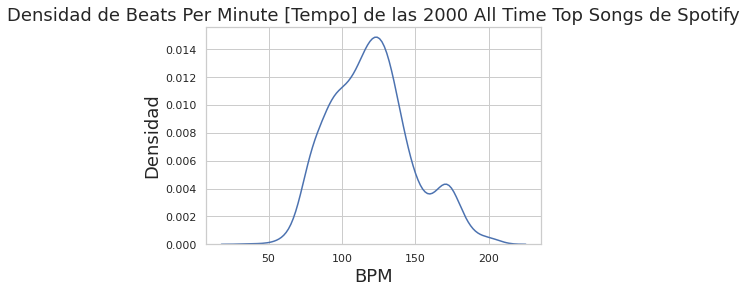

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
g = sns.distplot(spotify_songs["Beats Per Minute (BPM)"], hist=False)
g.set_title("Densidad de Beats Per Minute [Tempo] de las 2000 All Time Top Songs de Spotify", fontsize=18)
g.set_xlabel("BPM",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

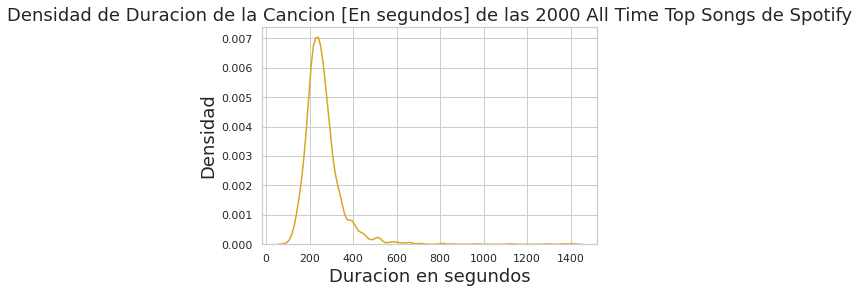

In [ ]:
g = sns.distplot(spotify_songs["Length (Duration)"], color='goldenrod', hist=False)
g.set_title("Densidad de Duracion de la Cancion [En segundos] de las 2000 All Time Top Songs de Spotify", fontsize=18)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Overlaid Histogram y Overlaid Density Plots

Una forma de comparar distribuciones sobre una misma base es realizar un overlay de distintos histogramas o funciones de densidad.

En este set de datos no contamos con atributos directamente comparables pero podriamos por ejemplo para distintos generos musicales calcular sus funciones de densidad y realizar una comparativa de las mismas para entender si su comportamiento es similar.

Por ejemplo podriamos analizar ese comportamiento respecto al Tempo (BPM) que hemos analizado anteriormente para distintos generos musicales.

In [ ]:
genres_counts = spotify_songs['Top Genre'].value_counts()
genres_counts[genres_counts > genres_counts.mean()]

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
modern rock           49
glam rock             49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
disco                 18
dutch rock            18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
Name: Top Genre, dtype: int64

Text(0, 0.5, 'Densidad')

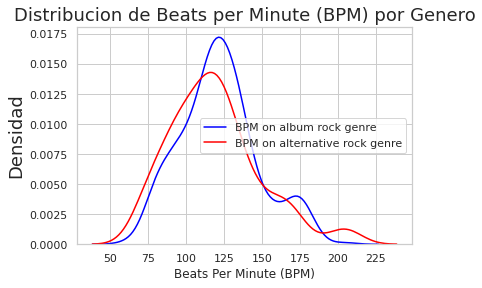

In [ ]:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]['Beats Per Minute (BPM)'], color="blue", label='BPM on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]['Beats Per Minute (BPM)'], color="red", label='BPM on alternative rock genre', hist=False)
g.set_title("Distribucion de Beats per Minute (BPM) por Genero", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Otro analisis posible es sobre la duracion de la canciones por genero, haciendo algo similar comparando las densidades.

Text(0, 0.5, 'Densidad')

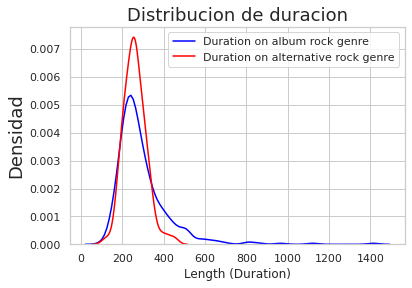

In [ ]:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='Duration on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='Duration on alternative rock genre', hist=False)

g.set_title("Distribucion de duracion", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Para realizar la aproximacion de la funcion de densidad, seaborn utiliza KDE (Kernel Density Estimation) es por eso que si queremos tener mayor control sobre el plot que queremos obtener, es interesante utilizar la funcion ```kdeplot```, por ejemplo para visualizar de mejor forma el area sobre la curva comun entre ambos plots.

Text(0, 0.5, 'Densidad')

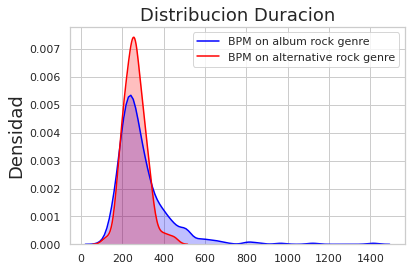

In [ ]:
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='BPM on album rock genre', shade=True)
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='BPM on alternative rock genre', shade=True)

g.set_title("Distribucion Duracion", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Visualización de relaciones por pares en un conjunto de datos

### Scatter Plot

Es una de las visualizaciones mas comunes, y versatiles. En un scatter plot representamos dos variables numericas en los ejes X e Y y por cada instancia de nuestro set de datos dibujamos un punto en las coordenadas indicadas.
Estos plots nos dan una idea de la dependencia que existe entre las dos variables y de las caracteristicas de esta dependencia: lineal, no-lineal, etc. Por otro lado podemos sumar mas dimensiones al analisis teniendo en cuenta que podemos darles distintos colores a los distintos puntos del plot.

En este escenario por ejemplo podriamos querer analizar la relacion que tenemos entre tu Tempo y su "Energia"

Text(0.5, 1.0, 'Energia vs. Beats Por Minuto (BPM)')

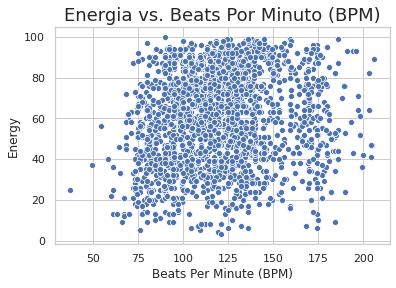

In [ ]:
g = sns.scatterplot(x="Beats Per Minute (BPM)", y="Energy", data=spotify_songs)
g.set_title("Energia vs. Beats Por Minuto (BPM)", fontsize=18)

En este escenario por ejemplo podriamos querer analizar la relacion que tenemos entre la duracion de la cancion y la popularidad de la misma.

Text(0.5, 1.0, 'Popularidad vs. Beats Por Minuto (BPM)')

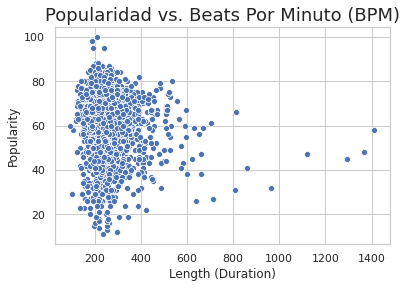

In [ ]:
g = sns.scatterplot(x="Length (Duration)", y="Popularity", data=spotify_songs)
g.set_title("Popularidad vs. Beats Por Minuto (BPM)", fontsize=18)

Podriamos tambien repetir este analisis para algunos artistas de nuestro set, por ejemplo the Beatles y Rolling Stones.

In [ ]:
beatles_stones_songs = spotify_songs[(spotify_songs['Artist'] == 'The Beatles') | (spotify_songs['Artist'] == 'The Rolling Stones')]

In [ ]:
beatles_stones_songs

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
148,149,I Want To Hold Your Hand - Remastered 2015,The Beatles,british invasion,2000,131,72,49,-6,31,87,146,39,5,75
284,285,Lady Jane - (Original Single Mono Version),The Rolling Stones,album rock,2004,205,47,38,-12,9,31,190,34,5,34
307,308,Lady Madonna - Remastered 2015,The Beatles,british invasion,2000,110,78,65,-5,22,57,137,14,3,63
313,314,We Can Work It Out - Remastered 2015,The Beatles,british invasion,2000,106,68,38,-9,18,65,136,6,3,63
318,319,Hey Jude,The Beatles,british invasion,2006,74,63,46,-7,40,59,239,9,2,63
588,589,Yellow Submarine,The Beatles,british invasion,2014,111,64,62,-7,52,65,159,21,3,58
800,801,Let It Be - Remastered 2009,The Beatles,british invasion,1970,143,40,44,-8,11,41,243,63,3,79
813,814,The Long And Winding Road - Remastered 2009,The Beatles,british invasion,1970,132,33,30,-10,6,39,218,76,3,64
820,821,Get Back - Remastered 2009,The Beatles,british invasion,1970,123,59,76,-10,61,33,189,49,6,65
849,850,Wild Horses,The Rolling Stones,album rock,1971,140,39,43,-7,8,16,342,69,3,72


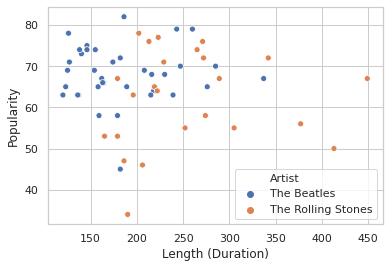

In [ ]:
sns.scatterplot(x="Length (Duration)", y="Popularity", data=beatles_stones_songs, hue="Artist")

### Pairplot

Algo que tambien podriamos por ejemplo querer hacer es poder rapidamente comparar la relacion de las distribuciones de distintas variables en un dataframe para lo cual es muy util la funcion ```pairplot``` en seaborn.

Esta funcion nos crea una matriz en la que en cada celda nos muestra la relacion entre atributos de un data frame a partir de un scatter plot. Tambien en el eje diagonal nos muestra la distribucion de cada variable en forma de histograma.

In [ ]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
for_pairwise_analisis = spotify_songs[['Beats Per Minute (BPM)','Length (Duration)','Popularity']]

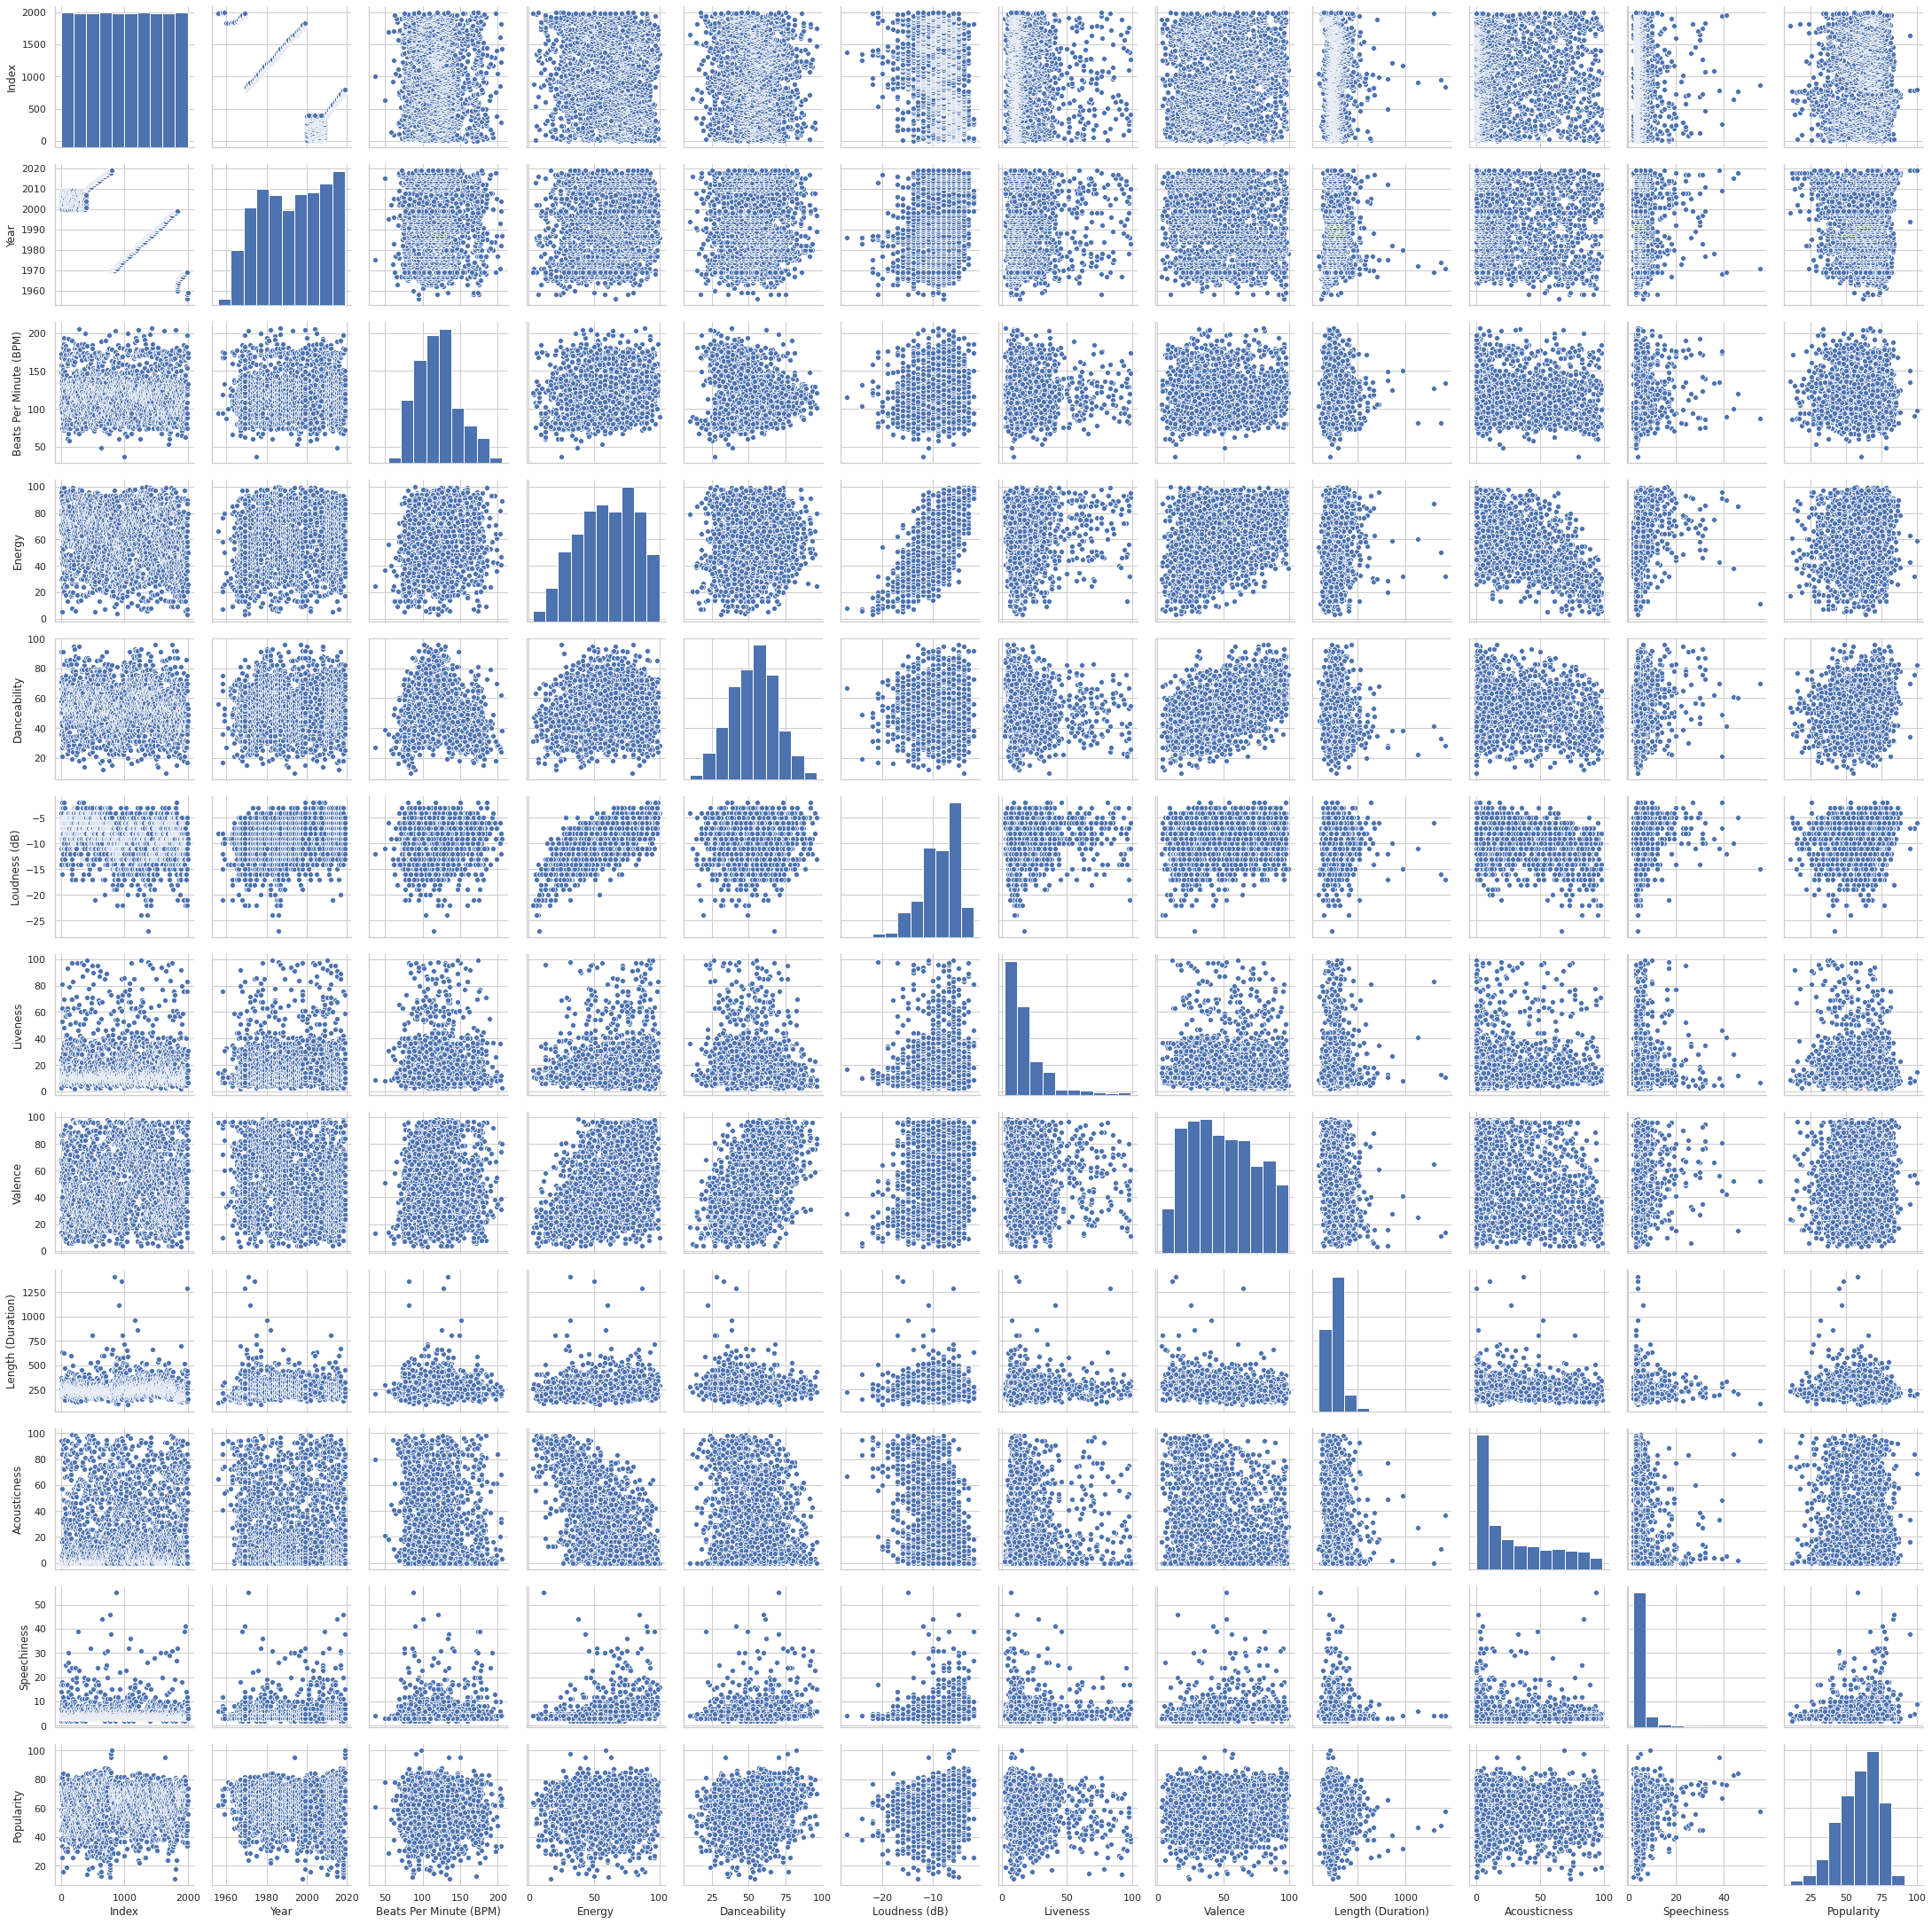

In [ ]:
sns.pairplot(spotify_songs)

Para una guia detallada de visualizacion de distribuciones utilizando seaborn, pueden consultar el siguiente link: https://seaborn.pydata.org/tutorial/distributions.html

## Analizando por Artistas con Mayor Representacion en el set

Otro aspecto que podriamos considerar es analizar aquellos artistas que tienen mayor representacion en el set, para ello podemos sacar inicialmente algunas estadisticas que pueden servirnos para el analisis en relacion a su media y desvio.

In [ ]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
spotify_songs['Artist'].value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Killing Joke           1
Emeli Sandé            1
Patrick Hernandez      1
Hozier                 1
Hero                   1
Name: Artist, Length: 731, dtype: int64

Para fines de la presentacion, vamos a tomar aquellos artistas que tienen mas de 24 canciones, para tomar asi los artistas que tienen mas canciones en el set.

In [ ]:
songs_by_main_artists = spotify_songs.groupby("Artist").filter(lambda x: len(x) >= 24)

In [ ]:
songs_by_main_artists

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
16,17,Speed of Sound,Coldplay,permanent wave,2005,123,90,52,-7,7,36,288,0,6,69
20,21,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
30,31,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,84
37,38,The Saints Are Coming,U2,irish rock,2006,152,81,32,-7,15,12,202,8,5,40
56,57,Sometimes You Can't Make It On Your Own,U2,irish rock,2004,96,60,53,-6,11,35,305,0,2,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,1950,Gimme Shelter,The Rolling Stones,album rock,1969,119,63,63,-8,17,49,271,45,3,76
1956,1957,You Can't Always Get What You Want,The Rolling Stones,album rock,1969,86,62,32,-10,25,47,449,64,6,67
1959,1960,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
1960,1961,Something - Remastered 2009,The Beatles,british invasion,1969,134,34,40,-11,14,38,182,20,3,72


Con estos datos seleccionados podemos calcular algunas estadisticas, por ejemplo media y desvio para el Tempo y duracion de sus canciones.

In [ ]:
print("Calculando la media de los artistas mas frecuentes en el set de datos")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].mean(),2))

Calculando la media de los artistas mas frecuentes en el set de datos
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                            127.00               274.78
Queen                               103.30               250.70
The Beatles                         119.22               184.58
The Rolling Stones                  118.21               254.92
U2                                  127.00               273.81


In [ ]:
print("Calculando el desvio de los artistas mas frecuentes en el set de datos")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].std(),2))

Calculando el desvio de los artistas mas frecuentes en el set de datos
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                             25.76                40.34
Queen                                26.22                58.47
The Beatles                          27.25                52.93
The Rolling Stones                   27.77                76.02
U2                                   25.74                49.43


## Boxplot

Una forma de ver esta misma informacion es utilizar una visualizacion conocida como boxplot. Usualmente usamos un boxplot para ver la distribucion de una variable numerica de acuerdo a una variable categorica (en este vamos a utilizar nuestro 5 posibles artistas).

Text(0, 0.5, 'BPM')

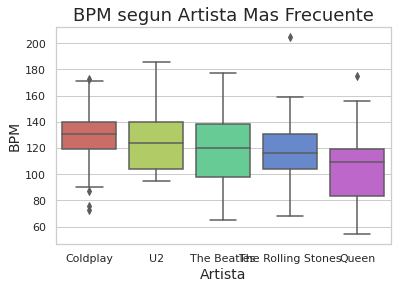

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sns.boxplot(x="Artist", y="Beats Per Minute (BPM)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("BPM segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

Text(0, 0.5, 'Length (Duration)')

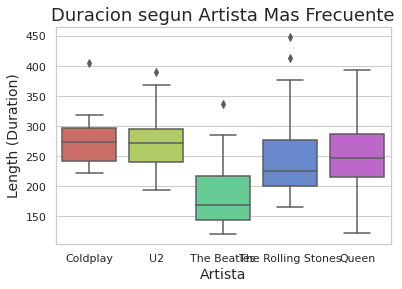

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sns.boxplot(x="Artist", y="Length (Duration)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("Duracion segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("Length (Duration)", fontsize=14)

Para leerlo tenemos que considerar que la 'caja' del boxplot va desde el primer al tercer cuantil, es decir que el 25% de los datos estan por debajo de la caja y el 25% de los datos estan por encima de la caja. La caja concentra entonces el 50% de los datos. Las lıneas que salen de la caja van desde el primer cuantil hasta el valor minimo y maximo y los puntos son valores anomalos (outliers).

# Generos con mayor cantidad de canciones

Pasando a las variables categoricas podriamos querer analizar cuales son los generos que tienen la mayor cantidad de canciones.

In [ ]:
main_genres_counts = spotify_songs["Top Genre"].value_counts()
main_genres_counts

album rock                     413
adult standards                123
dutch pop                       88
alternative rock                86
dance pop                       83
                              ... 
ccm                              1
hard rock                        1
australian alternative rock      1
laboratorio                      1
compositional ambient            1
Name: Top Genre, Length: 149, dtype: int64

In [ ]:
main_genres_counts = main_genres_counts[main_genres_counts > main_genres_counts.mean()]

In [ ]:
main_genres_counts

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
modern rock           49
glam rock             49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
disco                 18
dutch rock            18
glam metal            17
neo mellow            17
blues rock            15
alternative dance     15
art pop               14
Name: Top Genre, dtype: int64

## Bar Plot

Una forma de poder visualizar este tipo de informacion es utiliza un Bar Plot, de uso bastante popular y donde se cometen muchos errores. Algunas cosas que hay que tener en cuenta es que una de las variables a considerar debe ser categorica y por otro lado, los valores a evaluar deben comenzar en 0.

Existen otras variantes haciendo stacking de valores o directamente indicandolos en barras separadas de forma de que queden agrupados.

Text(0, 0.5, 'Genero')

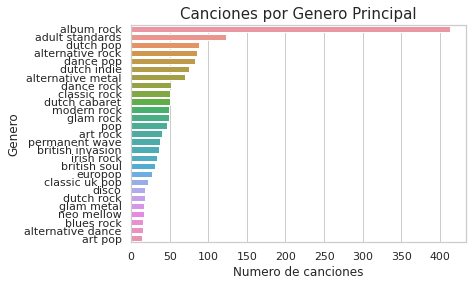

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=main_genres_counts.values, y=main_genres_counts.index, orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
  g.set_ylabel("Genero", fontsize=12)